### Computational Guided Inquiry for PChem (Neshyba, 2022)

# Numerical Moments

## Goals

An important quantitative use of probability densities is to calculate averages -- like a molecule's average speed, for example, or its average kinetic energy. Here we'll go about that in two steps: first we'll find what are called *moments*, then we'll convert those to *speed averages*.

Another goal of this exercise is to have you familiarize yourself with the shape of distribution functions, especially as the temperature changes. Along the way, you'll get accustomed to the idea of *normalization*.

## Normalization
Probability densities are supposed to have the property of being *normalized*. That means the area under a probability density curve -- for any given temperature -- equals one. Mathematically, for the Boltzmann probability density we'd express this as

$$ 
\int\limits_{-\infty}^{\infty} f_B(T,v_x) \ dv_x = 1 \ \ \ \ (1) 
$$

and for the Maxwell probability density

$$ 
\int\limits_0^{\infty} f_M(T,v) \ dv = 1 \ \ \ \ (2) 
$$

In this CGI, we're going to evaluate these integrals numerically, using the *trapezoidal rule* (see, e.g., https://en.wikipedia.org/wiki/Trapezoidal_rule).

## Moments of speeds

*Moments* in thermodynamics are denoted using the notation $\langle ...\rangle$. Assuming the quantity you are interested in averaging depends on the *speed* (as opposed to the *velocity component*), you would use the Maxwell density function. For example, the first moment of the speed is given by

$$ 
\langle v \rangle = \int\limits_0^{\infty} f_M(T,v) \ v \ dv  \ \ \ \ (3) 
$$

It then follows that higher-order moments would be written

$$ 
\langle v^n \rangle = \int\limits_0^{\infty} f_M(T,v) \ v^n \ dv \ \ \ \ (4) 
$$

These moments can be evaluated analytically, which means a closed-form expression is available. There are integral tables for that. But you can also evaluate them numerically -- which is nice because doing so can provide a check on your skill at using an integral table. The trapezoidal rule wowrks very nicely for this purpose too!


## Averages of speeds
These moments have different dimensions, and therefore different units: the units of $\langle v \rangle$ in SI would be $m/s$, whereas $\langle v^2 \rangle$ would be $m^2/s^2$. That makes it difficult to compare them to one another. To get around that, we can raise the moments to  appropriate exponents (like 1, 1/2, 1/3, etc.). When we do that, we also assign special names to the results:

- The first moment of the speed raised to the power "1" is just the *average speed*. We symbolize it as $\bar c$,

$$
\bar c = \langle v \rangle \ \ \ \ (5)
$$ 

- The second moment of the speed raised to the power "1/2" is the *root mean square* speed. We symbolize it as $c$,

$$
c = \langle v^2 \rangle ^\frac{1}{2} \ \ \ \ (6)
$$ 

- The third moment of the speed raised to the power "1/3" is the *cubed-root-mean-cubed speed*. We symbolize it as $\tilde c$,

$$
\tilde c = \langle v^3 \rangle ^\frac{1}{3} \ \ \ \ (7)
$$


## Learning Goals
1. Explain what it means to say that a probability density is *normalized*, and how to test whether it really is.
1. Write integral formulas for moments of the speed (and velocity components).
1. Describe how the trapezoidal rule works.
1. Integrate numerically (using np.trapz).
1. Use the label/legend method for multiple graphs in a single plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import PchemLibrary as PL

In [2]:
%matplotlib notebook

### Loading the probability densities
The first objective is to load in the velocity component/temperature "state space" and the Boltzmann function, and attach units using AssignQuantity (all are SI). We also report out the first and last temperatures, because we'll need that information later -- so write these temperatures in you paper notebook.

In [3]:
# Load the data
vx = np.loadtxt('vx.txt'); print(np.shape(vx))
TB = np.loadtxt('TB.txt'); print(np.shape(TB))
fB = np.loadtxt('fB.txt'); print(np.shape(fB))

# Attach units using AssignQuantity (all SI are in SI)
vx = AssignQuantity(vx,'m/s')
TB = AssignQuantity(TB,'K')
fB = AssignQuantity(fB,'s/m')

# Report the first and last temperatures
print('First temperature ',TB[0,0])
print('Last temperature ',TB[-1,0])

(50, 41)
(50, 41)
(50, 41)
First temperature  50.0 kelvin
Last temperature  500.0 kelvin


### Your turn
Now load in the speed/temperature "state space" and the Maxwell function. The files are named "v.txt", "TM.txt", and "fM.txt", and you should name the Python variables correspondingly (e.g., call the temperature grid "TM"). Attach units using AssignQuantity, just as we did with the Boltzmann arrays. Finally, report out the first and last temperatures, because we'll need that information later.

In [4]:
### BEGIN SOLUTION

v = np.loadtxt('v.txt'); print(np.shape(v))
TM = np.loadtxt('TM.txt'); print(np.shape(TM))
fM = np.loadtxt('fM.txt'); print(np.shape(fM))

v = AssignQuantity(v,'m/s')
TM = AssignQuantity(TM,'K')
fM = AssignQuantity(fM,'s/m')

# Report the first and last temperatures
print('First temperature ',TM[0,0])
print('Last temperature ',TM[-1,0])

### END SOLUTION

(50, 50)
(50, 50)
(50, 50)
First temperature  50.0 kelvin
Last temperature  500.0 kelvin


### Graphing
In the cell below, make

- a surface plot of $f_B(T_B,v_x)$, and 
- a second surface plot of $f_M(T_M,v)$

<IPython.core.display.Javascript object>


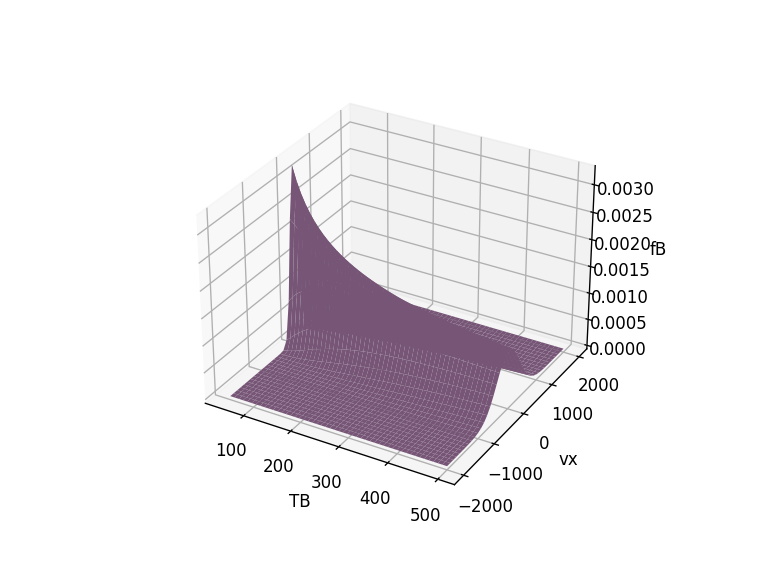

<IPython.core.display.Javascript object>


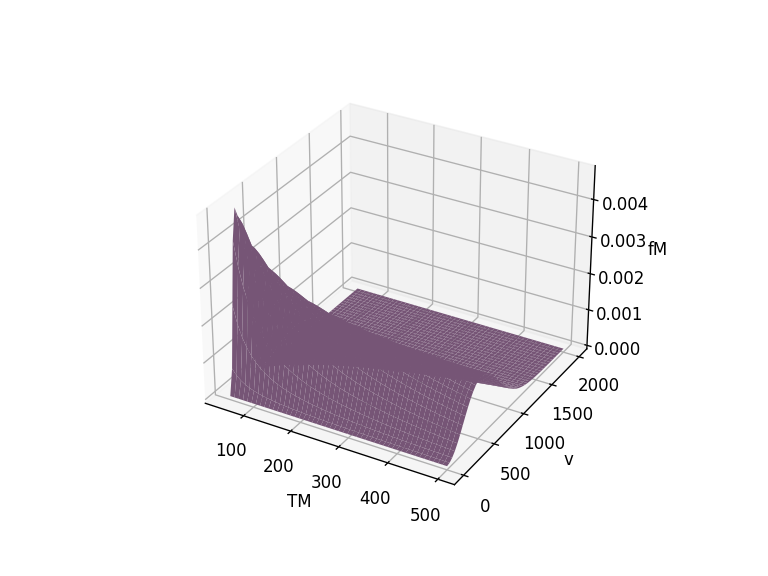

Text(0.5, 0, 'fM')

In [5]:
# Graphing fB(T,vx)
xlabel = "TB"
ylabel = "vx"
zlabel = "fB"
ax = PL.plot_surface(TB, vx, fB, color='plum') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

# Graphing the fM(T,v)
### BEGIN SOLUTION
xlabel = "TM"
ylabel = "v"
zlabel = "fM"
ax = PL.plot_surface(TM, v, fM, color='plum') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Slicing, legends, and normalization
The cell below takes slices of the first and last temperatures of $f_B(T_B,v_x)$ and graphs them on the same plot. The first slice is at a lower temperature, so it's colored blue; the last is colored red because it's hot.

We're also introducing a new way of identifying multiple graphs on a plot, called the *label/legend* method -- so have a look at that too.

<IPython.core.display.Javascript object>


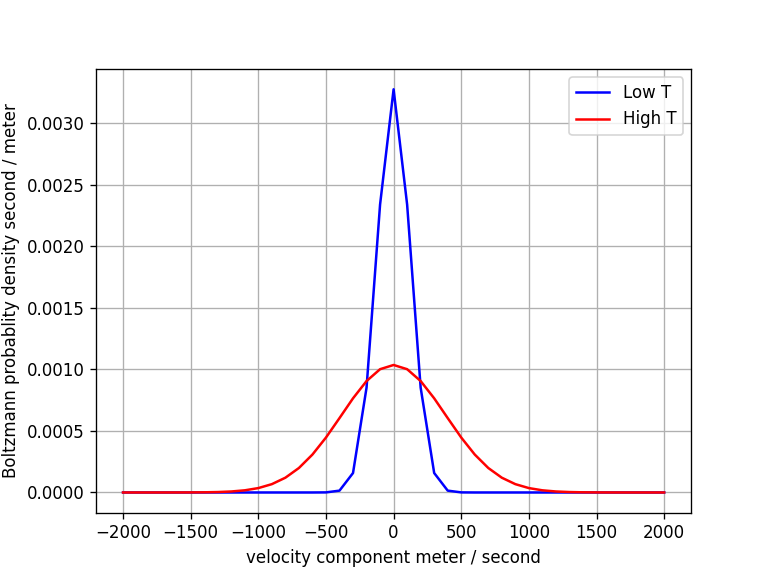

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, 'Boltzmann probablity density second / meter')

In [6]:
# Slicing
vx0 = vx[0,:]
fB0 = fB[0,:]
vxlast = vx[-1,:]
fBlast = fB[-1,:]

# Specifying labels 
xlabel = 'velocity component ' + str(vx0.units)
ylabel = 'Boltzmann probablity density ' + str(fBlast.units)

# Plot first and last using the label/legend method
plt.figure()
plt.plot(vx0,fB0,'blue',label='Low T')
plt.plot(vxlast,fBlast,'red',label='High T')
plt.legend()
plt.grid(True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

### Your turn
Now slice and plot $f_M(v)$ at the first and last temperatures. Use the "label/legend" method!

<IPython.core.display.Javascript object>


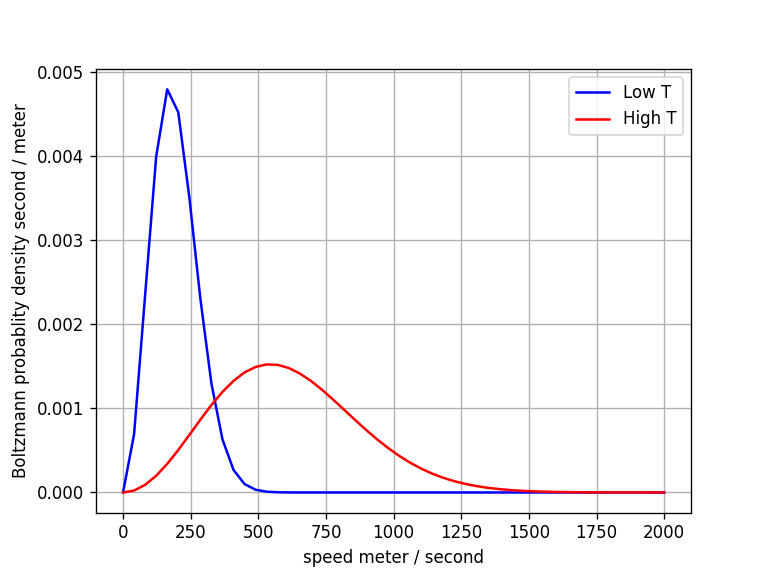

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [7]:
# Slice out the first and last temperatures of the Maxwell function
### BEGIN SOLUTION
v0 = v[0,:]
fM0 = fM[0,:]
vlast = v[-1,:]
fMlast = fM[-1,:]
### END SOLUTION

# Graph them together (using the label/legend method)
### BEGIN SOLUTION
xlabel = 'speed ' + str(v0.units)
ylabel = 'Boltzmann probablity density ' + str(fM0.units)

plt.figure()
plt.plot(v0,fM0,'blue',label='Low T')
plt.plot(vlast,fMlast,'red',label='High T')
plt.grid(True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

# plt.figure()
# plt.plot(v0,fM0*190,'b',label='fM (rescaled)')
# plt.plot(v0,fM0*v0,'b--',label='integrand')
# plt.grid(True)
# plt.xlabel(xlabel)
# plt.legend()
### END SOLUTION

### Numerical integration
Before we look at the moments of the velocity components, let's have a look at whether our Boltzmann functions are actually *normalized*. For this purpose, we'll use numpy's *trapz* function, which implements the trapezoidal rule for integration. Because this is a numerical method, we don't expect the area to be exactly one -- but we'll be happy if it's pretty close.

In [8]:
# Testing for normalization of fB, low-temperature
integrand = fB0
Area_under_fB0 = np.trapz(integrand,vx0)
print(Area_under_fB0)

# Testing for normalization of fB, high-temperature
integrand = fBlast
Area_under_fBlast = np.trapz(integrand,vxlast)
print(Area_under_fBlast)

1.0000000000003748 dimensionless
0.999999758456932 dimensionless


### Your turn
Below, test for normalization of our two Maxwell curves (low-temperature and high-temperature).

In [9]:
# Test for normalization of fM, low-temperature
### BEGIN SOLUTION
Area_under_fM0 = np.trapz(fM0,v0)
print(Area_under_fM0)
### END SOLUTION

# Test for normalization of fM, high-temperature
### BEGIN SOLUTION
Area_under_fMlast = np.trapz(fMlast,vlast)
print(Area_under_fMlast)
### END SOLUTION

0.9999999999999998 dimensionless
0.9999938111800983 dimensionless


### Moments 
Now we'll take a look at the *first moment* of the Maxwell density function. As you'll be able to see from the cell below, we can do this numerically using the same trapezoidal rule that we used to test for normalization of $f_M$: if you compare Eqs. (2) and (3), you'll see that the only difference is that the integrand is $f_M \times v$ (rather than $f_M$).

You'll also see in the cell below, that we're graphing this integrand ($f_M \times v$) as a function of $v$. The purpose of graphing the integrand in this way is to examine whether the integration "goes out" far enough that we're not missing anything.

<IPython.core.display.Javascript object>


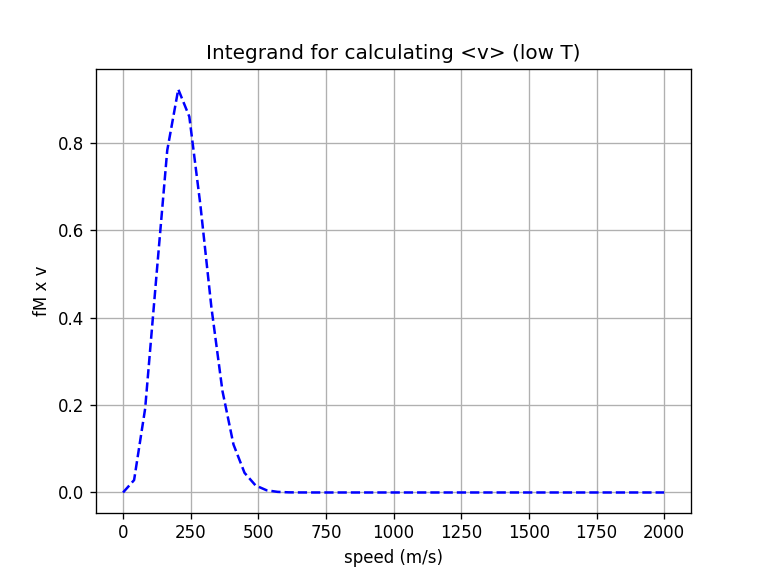

c-bar low T =
194.44844133694914 meter / second


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


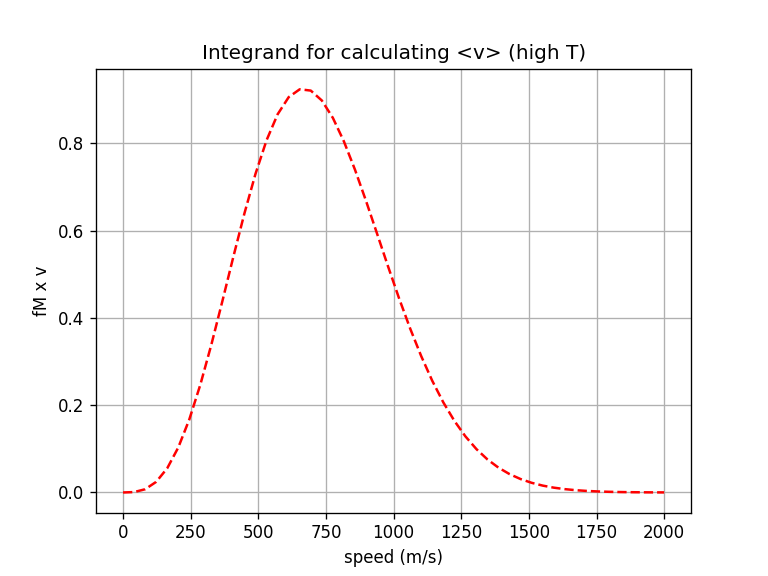

c-bar high T =
614.8543223911076 meter / second


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [10]:
# These will be good for both graphs
xlabel = 'speed (m/s)'
ylabel = 'fM x v'
title = 'Integrand for calculating <v>'

# Computing and plotting the integrand 
# of the low-temperature speed moment
integrand = fM0*v0
plt.figure()
plt.plot(v0,integrand,'b--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.title(title+' (low T)')

# Integrating numerically to get the mean speed
moment1 = np.trapz(integrand,v0)
cbar = moment1
print('c-bar low T =')
print(cbar)

# Computing and plotting the first integrand of the high-temperature speed
integrand = vlast*fMlast
plt.figure()
plt.plot(v0,integrand,'r--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.title(title+' (high T)')

# Computing and reporting the mean low-temperature speed
moment1 = np.trapz(integrand,vlast)
cbar = moment1
print('c-bar high T =')
print(cbar)

### Your turn
Now do something analogous for the *second* moment of the speed, at the first and last temperatures. Start with computing and plotting the relevant integrand. You should also print $c$, i.e., the *square root* of $<v^2>$, for each temperature (see Eq. 6). 

<IPython.core.display.Javascript object>


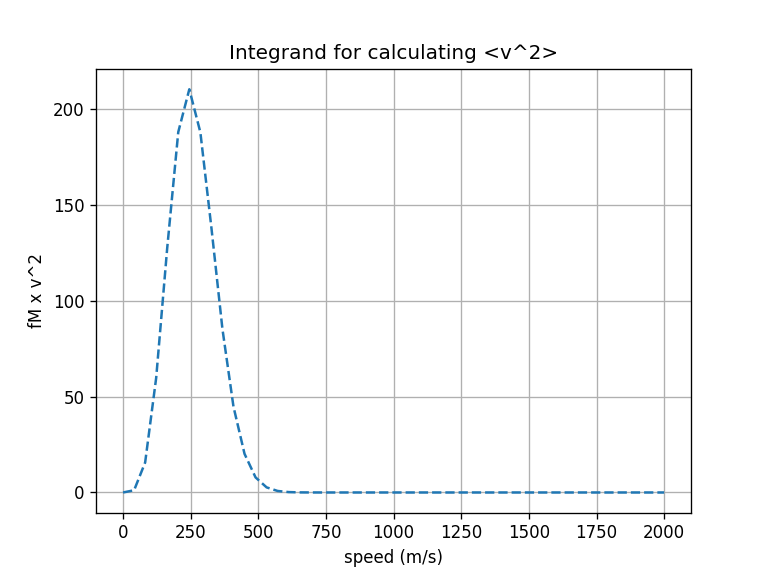

c, low T =  211.04332662817296 meter / second


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


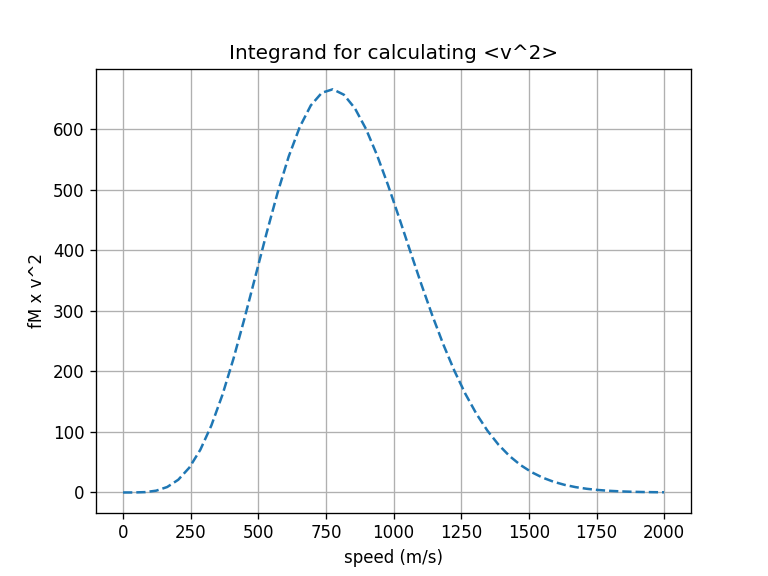

c, high T = 667.3576908073652 meter / second


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [11]:
# These will be good for both graphs
xlabel = 'speed (m/s)'
ylabel = 'fM x v^2'
title = 'Integrand for calculating <v^2>'

# Second moment of the low-temperature speed
### BEGIN SOLUTION
integrand = v0**2*fM0
moment2 = np.trapz(integrand,v0)
plt.figure()
plt.plot(v0,integrand,'--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Integrand for calculating <v^2>')
plt.grid(True)
print('c, low T = ', moment2**.5)
### END SOLUTION

# Second moment of the high-temperature speed
### BEGIN SOLUTION
integrand = vlast**2*fMlast
moment2 = np.trapz(integrand,v0)
plt.figure()
plt.plot(v0,integrand,'--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Integrand for calculating <v^2>')
plt.grid(True)
print('c, high T =', moment2**.5)
### END SOLUTION

### Your turn (again)
Now find values of the *third* moment, for the first and last temperatures. Also, print $\tilde c$, i.e., the corresponding *cubed root* of $<v^3>$ (see Eq. 7), at both temperatures.

<IPython.core.display.Javascript object>


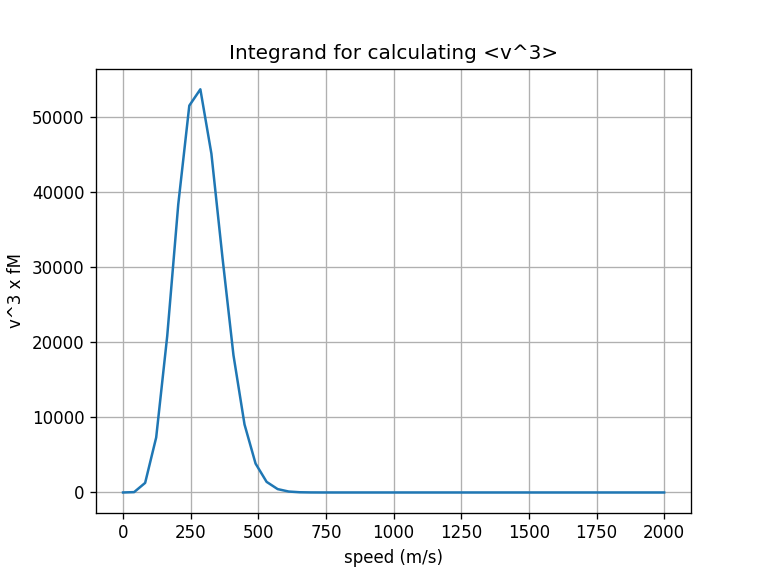

c-tilde, low T = 226.02383441954743 meter / second


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


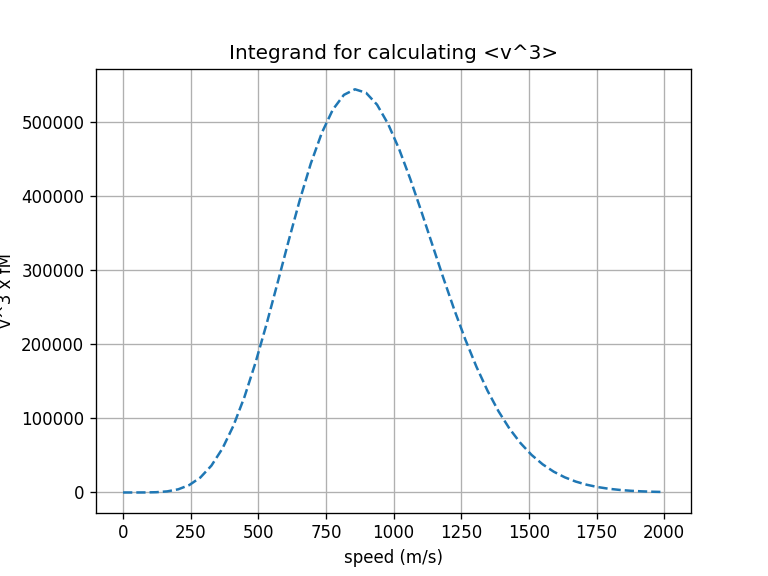

c-tilde, high T = 714.7143068309508 meter / second


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [12]:
# These will be good for both graphs
xlabel = 'speed (m/s)'
ylabel = 'v^3 x fM'

# Graphing the integrand and computing the third moment of the low-temperature speed
### BEGIN SOLUTION
integrand = v0**3*fM0
moment3 = np.trapz(integrand,v0)
plt.figure()
plt.plot(v0,integrand)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.title('Integrand for calculating <v^3>')
print('c-tilde, low T =', moment3**(1/3))
### END SOLUTION

# Graphing the integrand and computing the third moment of the high-temperature speed
### BEGIN SOLUTION
integrand = vlast**3*fMlast
moment3 = np.trapz(integrand,v0)
plt.figure()
plt.plot(v0,integrand,'--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.title('Integrand for calculating <v^3>')
print('c-tilde, high T =', moment3**(1/3))
### END SOLUTION

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page